In [ ]:
# Dans cette partie nous allons proceder à l'evaluation des performances de generalisation du modele que nous avons pris dans l'etape 2

In [3]:
import pandas as pd

df = pd.read_csv("data.feature.csv")

In [4]:
X_full = df.drop(columns=["demand"])
y_full = df["demand"]

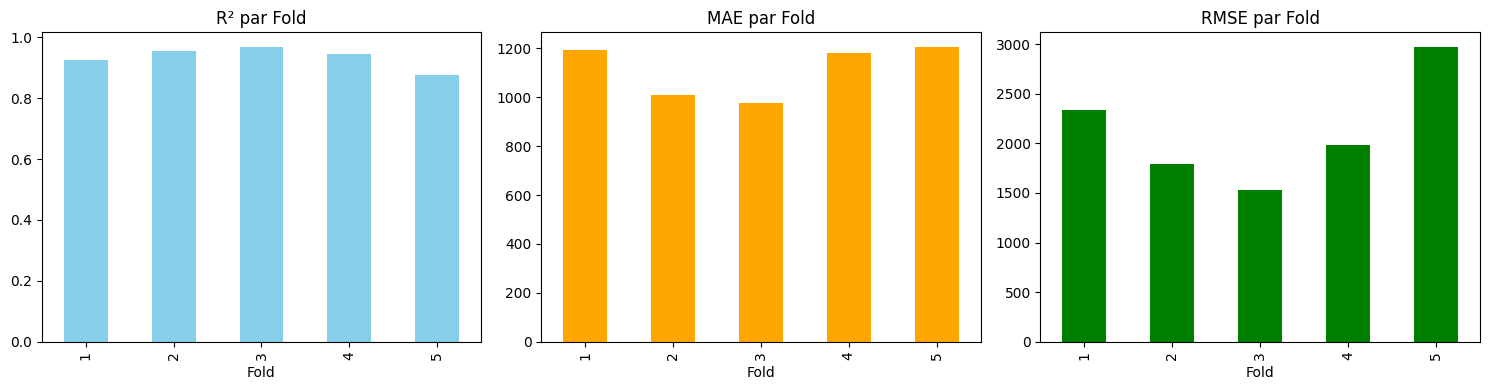


Moyennes :
Fold       3.000000
R²         0.933886
MAE     1112.572391
RMSE    2120.108619
dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
import numpy as np

#  Chargement dees données
df = pd.read_csv("data.feature.csv")
X_full = df.drop(columns=["demand"])
y_full = df["demand"]

#  Création des groupes
groups = X_full['pick_zone'].astype(str) + "_" + \
         X_full['day_of_week'].astype(str) + "_" + \
         X_full['hour'].astype(str)

# Définition du modèle
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

#  Validation croisée avec plusieurs métriques
cv = GroupKFold(n_splits=5)
scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error'
}

results = cross_validate(model, X_full, y_full, cv=cv, groups=groups,
                         scoring=scoring, return_train_score=False)

#  Organisation des scores
df_scores = pd.DataFrame({
    'Fold': range(1, cv.get_n_splits() + 1),
    'R²': results['test_r2'],
    'MAE': -results['test_mae'],   # valeurs positives
    'RMSE': -results['test_rmse']  # valeurs positives
})

#  Visualisation des résultats
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

df_scores.plot(x='Fold', y='R²', kind='bar', ax=axes[0], legend=False, color='skyblue')
axes[0].set_title("R² par Fold")

df_scores.plot(x='Fold', y='MAE', kind='bar', ax=axes[1], legend=False, color='orange')
axes[1].set_title("MAE par Fold")

df_scores.plot(x='Fold', y='RMSE', kind='bar', ax=axes[2], legend=False, color='green')
axes[2].set_title("RMSE par Fold")

plt.tight_layout()
plt.show()

#  Moyennes globales
print("\nMoyennes :")
print(df_scores.mean())



R² ≈ 0.93 : Le modèle explique environ 93 % de la variance de la demande, c’est excellent.

MAE ≈ 1112 : en moyenne, la prédiction s’écarte de la demande réelle d’environ 1112 unités (nombre de trajets).

RMSE ≈ 2120 : la racine carrée de l’erreur quadratique moyenne, un peu plus sensible aux grosses erreurs, est à 2120 unités.